In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_excel('output.xlsx')
for i in range(len(data.columns)):
    data.iloc[:, i] = np.log1p(data.iloc[:, i].pct_change())

C:\Users\User\AppData\Local\Temp\ipykernel_6692\1152177014.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data.iloc[:, i] = np.log1p(data.iloc[:, i].pct_change())


In [7]:
data.to_excel('outputReturns.xlsx', index=False)

In [59]:
data = pd.read_excel('outputReturns.xlsx')
eff = np.array([data.iloc[:, i].sum() / len(data) for i in range(len(data.columns))])

In [61]:
data -= eff[i]
data = data ** 2
risk = np.array([np.sqrt((data.iloc[:, i].sum()) / (len(data) - 1)) for i in range(len(data.columns))])

In [69]:
print(eff)
print(risk)
data_er = pd.DataFrame({'company': data.columns, 'effiency': eff,'risk': risk})
data_er.to_excel('outputEffRisk.xlsx', index=False)

[-9.05503221e-05 -5.40749307e-04  3.41529484e-04 -3.15035322e-04
  3.05320512e-04 -5.31287994e-04 -5.72416488e-04 -6.89974035e-04
  1.50129638e-03 -1.21900160e-04  6.19111526e-05 -1.31751090e-03
  2.93791043e-05  1.87742727e-03 -7.73372466e-04 -5.51113765e-04
  1.70665739e-04 -1.27774553e-03 -2.62307507e-04 -9.06000413e-04
  7.26390232e-05 -1.65395092e-04 -2.42258296e-04 -1.42522053e-03
 -1.02251052e-03 -9.21861193e-04 -1.71755604e-04  1.43817138e-04
 -1.64816370e-04 -9.88373125e-04 -5.47983354e-04  2.82699041e-04
  3.99407323e-04  1.08420511e-04 -7.81302213e-04 -4.55852921e-05
  2.12909918e-04 -6.69153561e-04 -2.81993013e-04  1.83227579e-03
 -5.06815808e-04 -1.01701129e-03 -5.89646291e-04 -1.72041775e-04
  1.18471118e-03 -2.24997825e-03 -1.51464024e-03 -5.05728893e-04
 -5.39615989e-04 -1.28688216e-03 -3.47057455e-04  2.32890505e-04
 -4.44720623e-04 -1.63946199e-04 -4.99406552e-04 -5.62433000e-04
 -3.79856245e-04  9.02195405e-04  6.14508912e-04 -2.04192802e-03
 -2.20463670e-04 -1.55493

   effiency      risk    company
0 -0.000091  0.011651  000001.SZ
1 -0.000541  0.024495  000002.SZ
2  0.000342  0.026077  000004.SZ
3 -0.000315  0.029742  000006.SZ
4  0.000305  0.021107  000007.SZ


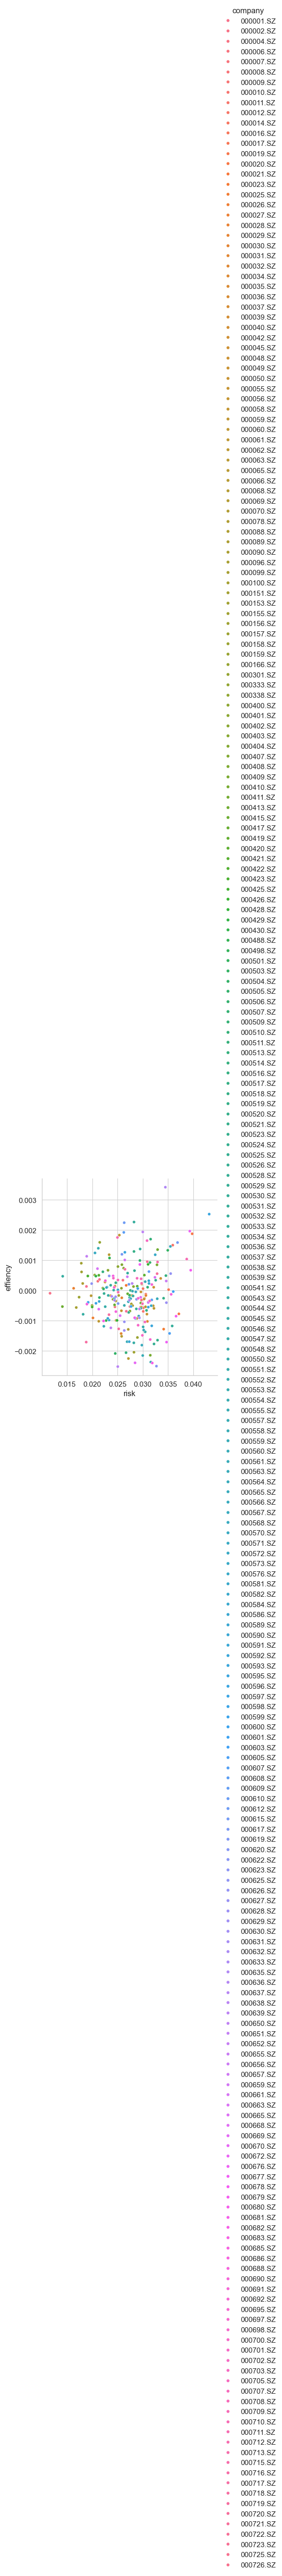

In [79]:
import seaborn as sns

sns.set_theme('paper', font_scale=1.25)

data_eff_risk = pd.DataFrame({'effiency': eff,'risk': risk, 'company': data.columns})
print(data_eff_risk.head())
sns.set_style("whitegrid")
sns.color_palette("bright")
g = sns.relplot(
    data=data_eff_risk,
    x="risk", y="effiency", hue="company", s=20
)

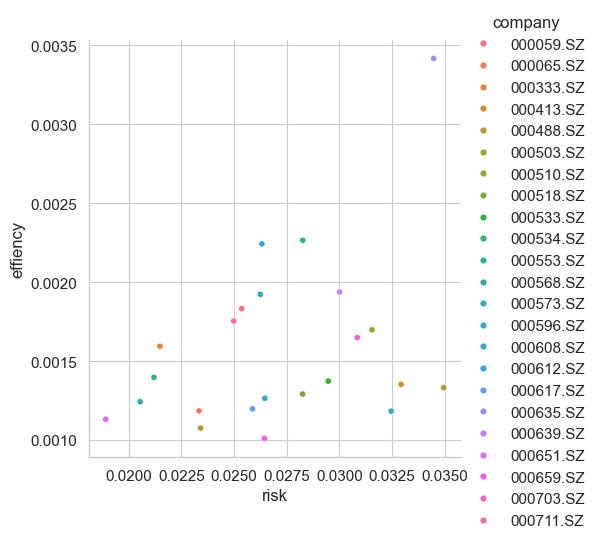

In [99]:
data_eff_risk = pd.DataFrame({'effiency': eff,'risk': risk, 'company': data.columns})
data_eff_risk = data_eff_risk[data_eff_risk['risk'] < 0.035]
data_eff_risk = data_eff_risk[data_eff_risk['effiency'] > 0.001]
g = sns.relplot(
    data=data_eff_risk,
    x="risk", y="effiency", hue="company", s=20
)

   effiency      risk    company
0  0.000177  0.008552  601398.SS
1  0.001991  0.016445  600519.SS
2  0.000188  0.008397  601288.SS
3 -0.000066  0.012340  601857.SS
4 -0.000264  0.010587  601988.SS


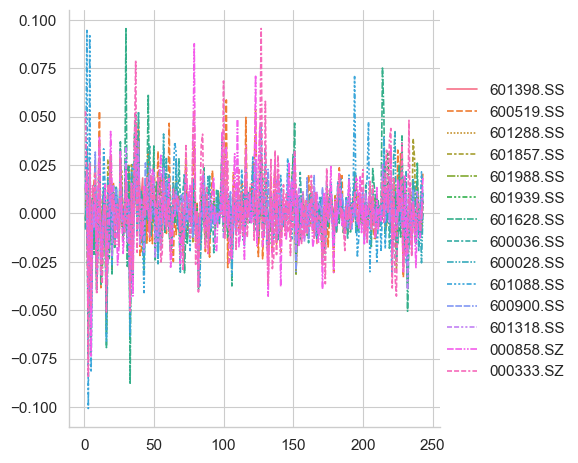

In [39]:
data = pd.read_excel('outputTopCapReturns2.xlsx')
sns.set_theme('paper', font_scale=1.25)

print(data_eff_risk.head())
sns.set_style("whitegrid")
g = sns.relplot(
    data=data, kind="line",
)